In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 生成样本数据
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)

# 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# 定义逻辑回归模型
model = LogisticRegression(random_state=123)

# 在训练集上拟合模型
model.fit(X_train, y_train)

# 在测试集上进行预测，并计算预测概率
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算ROC曲线上的各个点和AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# 输出AUC指标
print('AUC:', roc_auc)

AUC: 0.9945330903595716


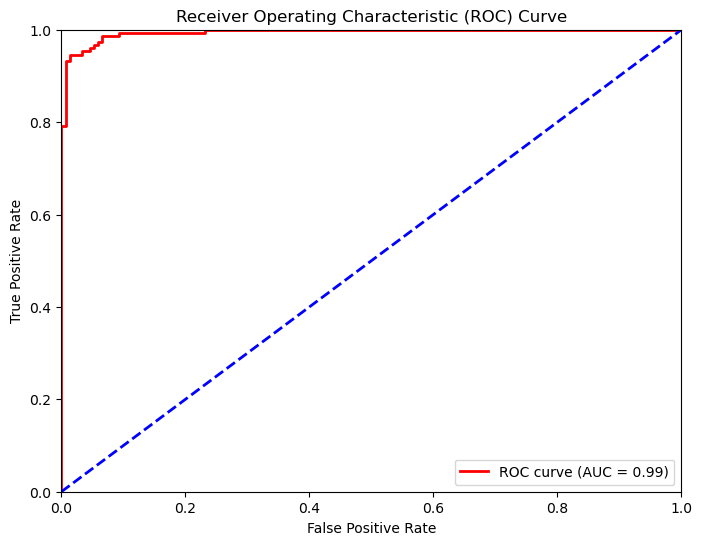

In [3]:
import matplotlib.pyplot as plt

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
